In [61]:
from cv2 import threshold
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

df = pd.read_csv("/home/kathy/NPHdata.csv")
df.dropna(inplace=True, subset=['File Name'])
df


thresholds = list(range(int(4937.055727), int(168133.2351), int(1631.0)))

#threshold = [112583]
print(thresholds)

[4937, 6568, 8199, 9830, 11461, 13092, 14723, 16354, 17985, 19616, 21247, 22878, 24509, 26140, 27771, 29402, 31033, 32664, 34295, 35926, 37557, 39188, 40819, 42450, 44081, 45712, 47343, 48974, 50605, 52236, 53867, 55498, 57129, 58760, 60391, 62022, 63653, 65284, 66915, 68546, 70177, 71808, 73439, 75070, 76701, 78332, 79963, 81594, 83225, 84856, 86487, 88118, 89749, 91380, 93011, 94642, 96273, 97904, 99535, 101166, 102797, 104428, 106059, 107690, 109321, 110952, 112583, 114214, 115845, 117476, 119107, 120738, 122369, 124000, 125631, 127262, 128893, 130524, 132155, 133786, 135417, 137048, 138679, 140310, 141941, 143572, 145203, 146834, 148465, 150096, 151727, 153358, 154989, 156620, 158251, 159882, 161513, 163144, 164775, 166406, 168037]


In [49]:
#list(range(int(4937.055727), int(168133.2351), int(1631.0)))[66]

In [50]:
from re import A
import numpy as np

res = {}

list_tp, list_fn, list_fp, list_tn = [], [], [], []


for threshold in thresholds:
    list_tp.append(0)
    list_fn.append(0)
    list_fp.append(0)
    list_tn.append(0)

    for index, instance in df.iterrows():
        actual = instance["Has NPH?"]
        prediction = instance["Manual Threshold - Ventricular Volume"]
        pred = True if instance['Ventricular Volume (mm^3)'] > threshold else False
        res.setdefault(threshold, []).append(pred)

        if actual == "TRUE" and pred == True:
            list_tp[-1] += 1
        elif actual == "FALSE" and pred == False:
            list_tn[-1] += 1
        elif actual == "TRUE" and pred == False:
            list_fn[-1] += 1
        elif actual == "FALSE" and pred  == True:
            list_fp[-1] += 1

    print(list_fn)


[0]
[0, 0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3]


In [51]:
list_tpr = []
list_fpr = []
for i in range(len(list_fp)):
    list_tpr.append(list_tp[i]/(list_tp[i]+list_fn[i]))
    list_fpr.append(list_fp[i]/(list_tn[i]+list_fp[i]))

0.9495980210265925

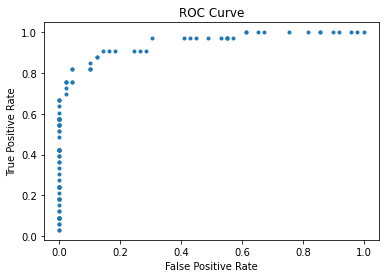

In [52]:
import matplotlib.pyplot as plt
from sklearn import metrics

plt.plot(list_fpr, list_tpr, ".")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

metrics.auc(list_fpr, list_tpr)

In [62]:
#metrics

list_indices = []
list_thresholds = []
list_accuracies = []
list_precisions = []
list_recalls = []
list_specificities = []


for i in range(len(list_tp)):

    list_indices.append(i)

    accuracy = (list_tp[i] + list_tn[i]) / (list_tn[i] + list_fn[i] + list_fp[i] + list_tp[i])
    list_accuracies.append(accuracy)

    precision = (list_tp[i]/(list_fp[i]+list_tp[i]))
    list_precisions.append(precision)

    recall = (list_tp[i]/(list_fn[i]+list_tp[i]))
    list_recalls.append(recall)

    specificity = (list_tn[i]/(list_fp[i]+list_tn[i]))
    list_specificities.append(specificity)


print("Indices: " + str(list_indices))

print("Accuracy: " + str(list_accuracies))

print("Precision: " + str(list_precisions))

print("Recall: " + str(list_recalls))

print("Specificity: " + str(list_specificities))

Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Accuracy: [0.4024390243902439, 0.4146341463414634, 0.4268292682926829, 0.45121951219512196, 0.4634146341463415, 0.4878048780487805, 0.4878048780487805, 0.5121951219512195, 0.5487804878048781, 0.5975609756097561, 0.6097560975609756, 0.6341463414634146, 0.6341463414634146, 0.6463414634146342, 0.6585365853658537, 0.6585365853658537, 0.6585365853658537, 0.6707317073170732, 0.6951219512195121, 0.7195121951219512, 0.7317073170731707, 0.7439024390243902, 0.8048780487804879, 0.7926829268292683, 0.8048780487804879, 0.8170731707317073, 0.8536585365853658, 0.8658536585365854, 0.8780487804878049, 0.8

In [54]:
import numpy as np
np.argmax(list_fpr[::-1][:70])

66

In [55]:
list_tpr[::-1][62], list_fpr[::-1][62]

(0.7575757575757576, 0.04081632653061224)

In [56]:
list_tpr[::-1][66], list_fpr[::-1][66]

(0.8181818181818182, 0.10204081632653061)

In [64]:
str(list_fpr)

'[1.0, 0.9795918367346939, 0.9591836734693877, 0.9183673469387755, 0.8979591836734694, 0.8571428571428571, 0.8571428571428571, 0.8163265306122449, 0.7551020408163265, 0.673469387755102, 0.6530612244897959, 0.6122448979591837, 0.6122448979591837, 0.5714285714285714, 0.5510204081632653, 0.5510204081632653, 0.5510204081632653, 0.5306122448979592, 0.4897959183673469, 0.4489795918367347, 0.42857142857142855, 0.40816326530612246, 0.30612244897959184, 0.2857142857142857, 0.2653061224489796, 0.24489795918367346, 0.1836734693877551, 0.16326530612244897, 0.14285714285714285, 0.12244897959183673, 0.12244897959183673, 0.10204081632653061, 0.10204081632653061, 0.10204081632653061, 0.10204081632653061, 0.04081632653061224, 0.04081632653061224, 0.04081632653061224, 0.04081632653061224, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [58]:
max(list_fpr[::-1][:70])

0.10204081632653061

In [66]:
str(list_tpr)

'[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9696969696969697, 0.9696969696969697, 0.9696969696969697, 0.9696969696969697, 0.9696969696969697, 0.9696969696969697, 0.9696969696969697, 0.9696969696969697, 0.9696969696969697, 0.9696969696969697, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.8787878787878788, 0.8787878787878788, 0.8484848484848485, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7272727272727273, 0.696969696969697, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6363636363636364, 0.6060606060606061, 0.5757575757575758, 0.5757575757575758, 0.5757575757575758, 0.5757575757575758, 0.5757575757575758, 0.5757575757575758, 0.5757575757575758, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.545454545454

In [60]:
list(range(int(4937.055727), int(168133.2351), int(1631.0)))


[4937,
 6568,
 8199,
 9830,
 11461,
 13092,
 14723,
 16354,
 17985,
 19616,
 21247,
 22878,
 24509,
 26140,
 27771,
 29402,
 31033,
 32664,
 34295,
 35926,
 37557,
 39188,
 40819,
 42450,
 44081,
 45712,
 47343,
 48974,
 50605,
 52236,
 53867,
 55498,
 57129,
 58760,
 60391,
 62022,
 63653,
 65284,
 66915,
 68546,
 70177,
 71808,
 73439,
 75070,
 76701,
 78332,
 79963,
 81594,
 83225,
 84856,
 86487,
 88118,
 89749,
 91380,
 93011,
 94642,
 96273,
 97904,
 99535,
 101166,
 102797,
 104428,
 106059,
 107690,
 109321,
 110952,
 112583,
 114214,
 115845,
 117476,
 119107,
 120738,
 122369,
 124000,
 125631,
 127262,
 128893,
 130524,
 132155,
 133786,
 135417,
 137048,
 138679,
 140310,
 141941,
 143572,
 145203,
 146834,
 148465,
 150096,
 151727,
 153358,
 154989,
 156620,
 158251,
 159882,
 161513,
 163144,
 164775,
 166406,
 168037]